

# Projet d'Analyse de Données USSI09 - Habitudes et Performance Académique des Étudiants

## Introduction

Ce notebook présente notre projet d'analyse de données réalisé dans le cadre du module USSI09 "Analyse de données" pour l'année 2024-2025. Nous nous intéressons à l'étude des relations entre les habitudes quotidiennes des étudiants et leur performance académique, un sujet particulièrement pertinent dans le contexte éducatif actuel.

## Équipe

- Alla Mohamed [@Mohamed-A2001](https://github.com/Mohamed-A2001)
- Planche Tom [@TomPlanche](https://github.com/Mohamed-A2001)

## Description du Dataset

Nous avons choisi d'analyser le dataset [Student Habits and Academic Performance](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance) qui contient des données sur les habitudes quotidiennes des étudiants et leurs résultats académiques.

Ce dataset comporte:

- Nombre d'observations: 204 étudiants
- Nombre de variables: 18 variables
- Variables principales:
  - Variables démographiques: Age, Gender, Location
  - Habitudes d'étude: Study Hours, Sleep Hours, Exercise Frequency
  - Utilisation de la technologie: Technology Usage, Social Media Usage
  - Facteurs psychologiques: Stress Level, Anxiety Level
  - Performance académique: Academic Performance (GPA)

## Objectifs du projet

Notre analyse se structure autour de deux axes principaux:

1. **Analyse descriptive et exploratoire**:
   - Extraction de statistiques univariées pour comprendre la distribution des habitudes étudiantes et performances académiques
   - Analyse des relations entre variables (statistiques bivariées) pour identifier les corrélations entre habitudes et résultats
   - Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité et identifier les facteurs principaux influençant la réussite académique
   - Visualisations pertinentes pour illustrer les relations découvertes

2. **Modélisation prédictive**:
   - Développement d'un modèle de régression linéaire pour prédire la performance académique (GPA) à partir des habitudes des étudiants
   - Évaluation des performances du modèle
   - Interprétation des résultats pour identifier les habitudes ayant le plus d'impact sur la réussite académique

## Méthodologie

Notre approche suit les étapes suivantes:

1. Chargement et nettoyage des données du dataset "Student Habits and Academic Performance"
2. Analyse exploratoire des données (EDA) pour comprendre les distributions et relations
3. Prétraitement des données pour l'analyse (standardisation, traitement des valeurs manquantes)
4. Analyse en Composantes Principales pour identifier les facteurs principaux influençant la performance académique
5. Modélisation par régression linéaire pour prédire le GPA des étudiants
6. Interprétation des résultats et identification des habitudes les plus déterminantes pour la réussite académique

## Plan du notebook

1. **Configuration de l'environnement et chargement des données**
2. **Nettoyage et préparation des données**
   - Traitement des valeurs manquantes
   - Encodage des variables catégorielles (Gender, Location, etc.)
   - Normalisation des variables numériques
3. **Analyse exploratoire des données**
   - Statistiques descriptives des habitudes étudiantes et performances
   - Visualisations des distributions (heures d'étude, sommeil, utilisation des médias sociaux)
4. **Statistiques bivariées et corrélations**
   - Corrélations entre les habitudes et la performance académique
   - Analyse des relations entre stress, anxiété et résultats
5. **Analyse en Composantes Principales**
   - Réduction de dimensionnalité
   - Identification des facteurs principaux
   - Visualisation des étudiants dans l'espace réduit
6. **Modélisation prédictive**
   - Régression linéaire pour prédire le GPA
   - Évaluation du modèle (RMSE, R²)
7. **Interprétation des résultats**
   - Identification des habitudes ayant le plus d'impact sur la performance
   - Recommandations basées sur l'analyse
8. **Conclusion et perspectives**

# 1. Configuration de l'environnement et chargement des données

In [19]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Chargement du dataset
data_path = "assets/enhanced_student_habits_performance_dataset.csv"
df = pd.read_csv(data_path)

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


# 2. Nettoyage et préparation des données

## 2.1. Transformations des données.

Des colonne ont des types `yes/no`, changeons les en 1/0.

In [20]:
# Colonnes à transformer ("Yes/No" -> 1/0
columns_to_transform = [
    "part_time_job",
    "extracurricular_participation",
    "dropout_risk",
    "access_to_tutoring"
]

# Transformation des données
for col in columns_to_transform:
    df[col] = df[col].map(lambda x: int(str(x).lower() == "yes"))

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,1,70.3,6.2,Poor,3,Some College,High,6.0,1,4.00,5,5.8,0,0,10.9,Co-Learning Group,1,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,0,88.4,7.2,Good,4,PhD,Low,6.8,0,4.00,7,5.8,0,5,8.3,Co-Learning Group,1,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,0,82.1,9.2,Good,4,High School,Low,5.7,1,3.79,4,8.0,0,5,8.0,Library,1,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,1,79.3,4.2,Fair,3,Master,Medium,8.5,1,4.00,6,4.6,0,3,11.7,Co-Learning Group,1,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,1,62.9,6.5,Good,6,PhD,Low,9.2,0,4.00,4,5.7,0,2,9.4,Quiet Room,1,Medium,9,1,10,Reading,7.1,98


## 2.2 Ajout de colonnes.

In [21]:
# On combine les temps d'écran
df["total_screen_time"] = df["social_media_hours"] + df["netflix_hours"]

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,total_screen_time
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,1,70.3,6.2,Poor,3,Some College,High,6.0,1,4.00,5,5.8,0,0,10.9,Co-Learning Group,1,High,9,7,8,Reading,3.0,100,3.1
1,100001,28,Male,Arts,5.700000,0.5,0.4,0,88.4,7.2,Good,4,PhD,Low,6.8,0,4.00,7,5.8,0,5,8.3,Co-Learning Group,1,Low,7,2,10,Reading,6.0,99,0.9
2,100002,17,Male,Arts,2.400000,4.2,0.7,0,82.1,9.2,Good,4,High School,Low,5.7,1,3.79,4,8.0,0,5,8.0,Library,1,High,3,9,6,Kinesthetic,7.6,98,4.9
3,100003,27,Other,Psychology,3.400000,4.6,2.3,1,79.3,4.2,Fair,3,Master,Medium,8.5,1,4.00,6,4.6,0,3,11.7,Co-Learning Group,1,Low,5,3,10,Reading,3.2,100,6.9
4,100004,25,Female,Business,4.700000,0.8,2.7,1,62.9,6.5,Good,6,PhD,Low,9.2,0,4.00,4,5.7,0,2,9.4,Quiet Room,1,Medium,9,1,10,Reading,7.1,98,3.5


# 3. Extraction de statistiques décrivant les variables individuelles (statistiques univariées)

## 3.1 Identification des types de variables

## 3.2 Analyse des variables qualitatives

/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_8915/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')
/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_8915/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')
/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_8915/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

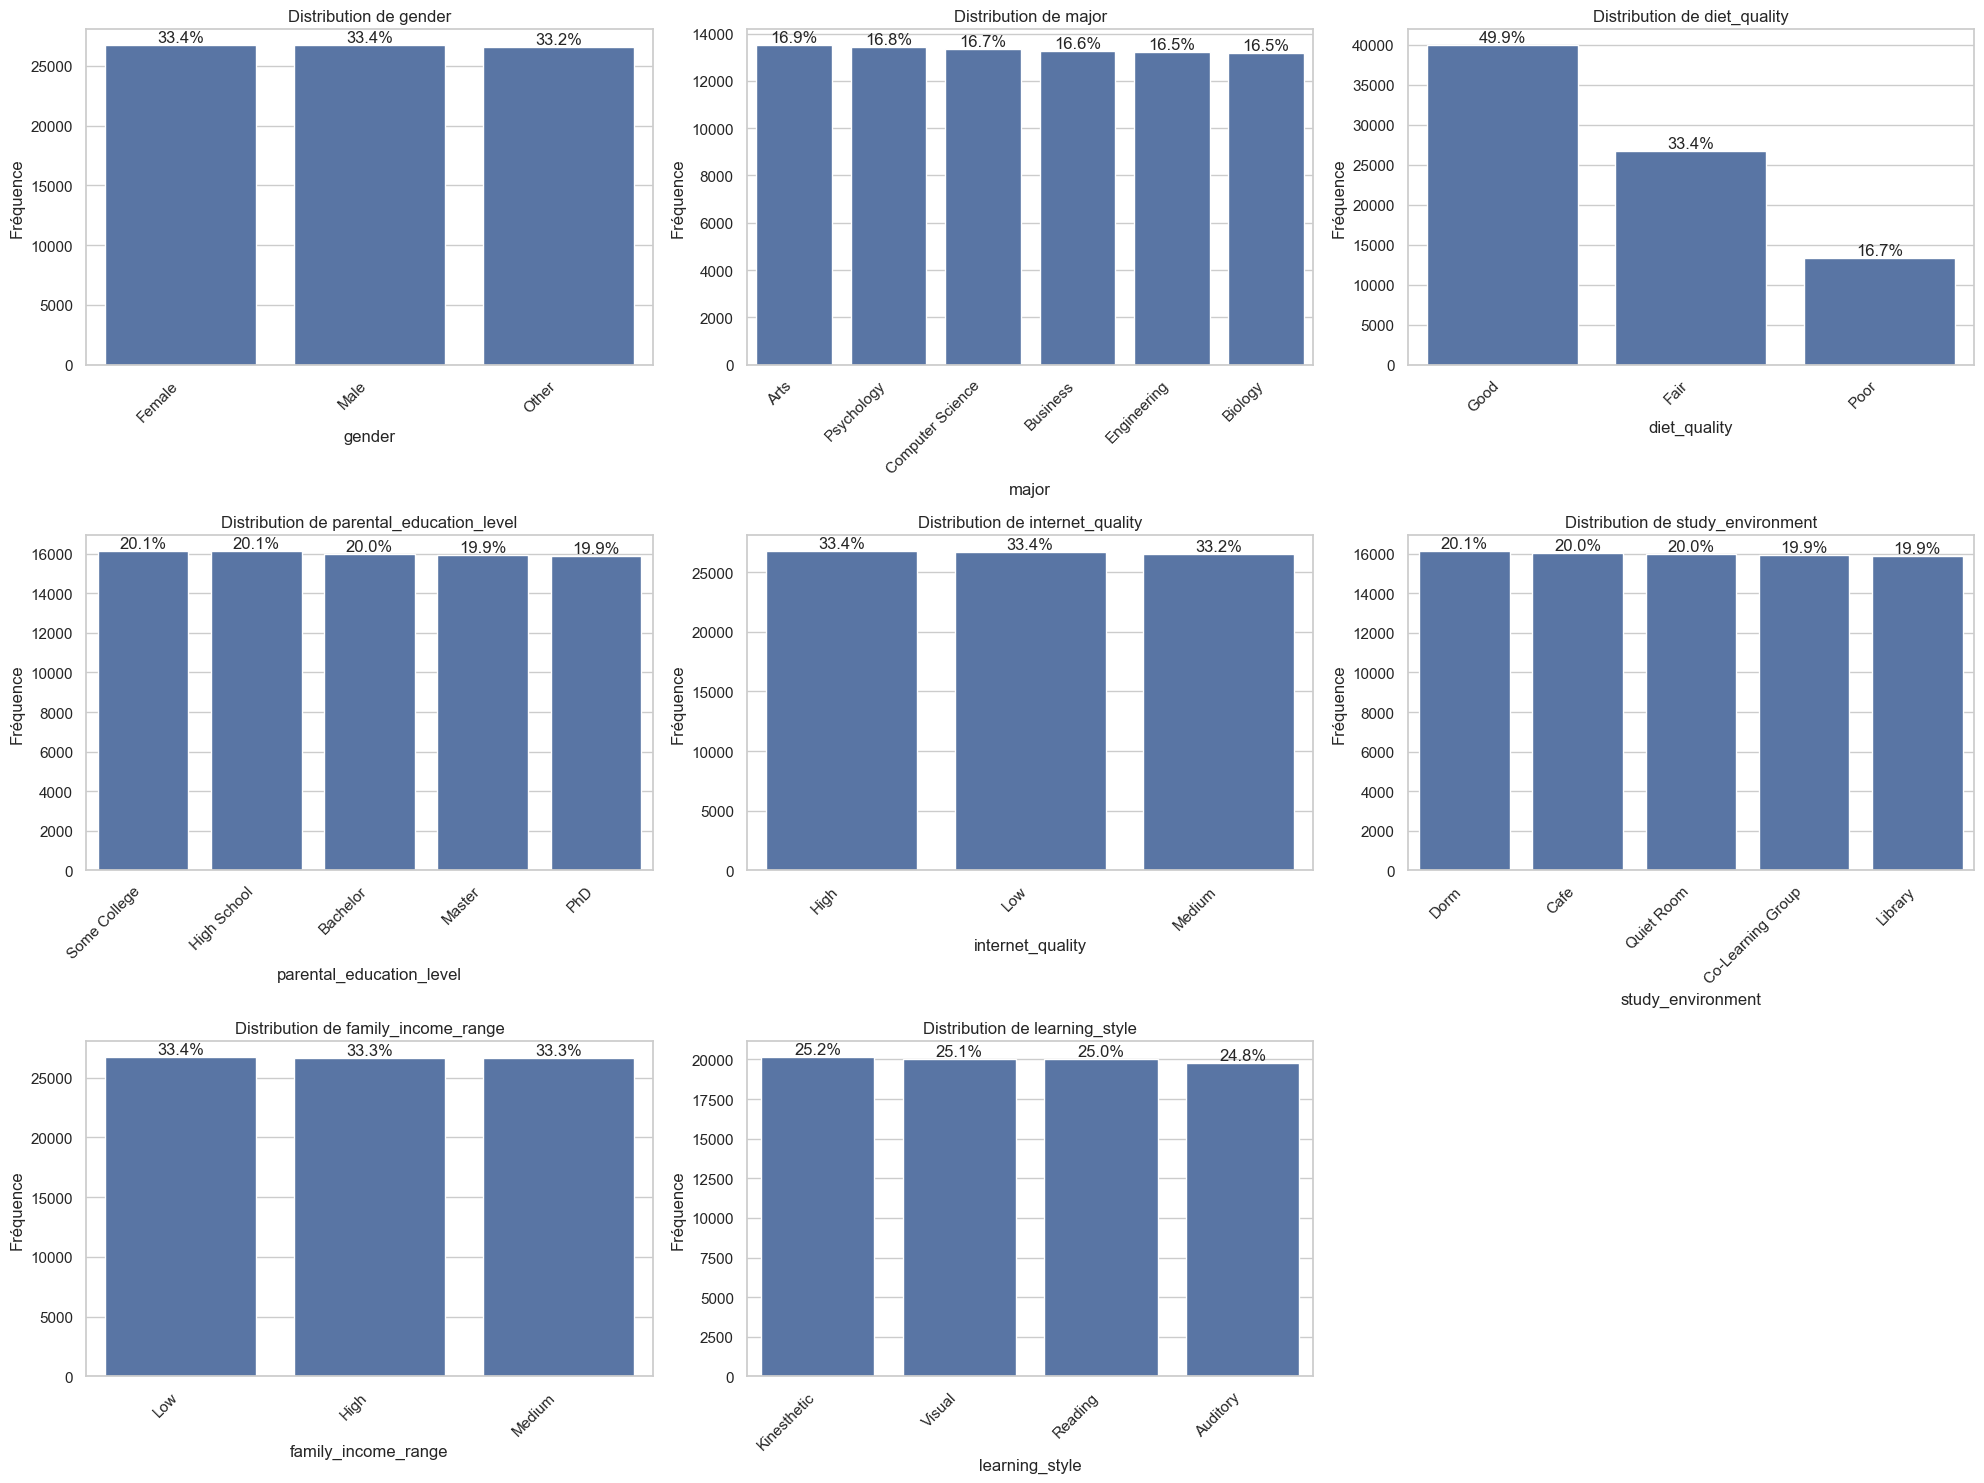


Statistiques pour gender:
        Fréquence  Pourcentage
gender                        
Female      26705     33.38125
Male        26698     33.37250
Other       26597     33.24625

Statistiques pour major:
                  Fréquence  Pourcentage
major                                   
Arts                  13505     16.88125
Psychology            13437     16.79625
Computer Science      13352     16.69000
Business              13276     16.59500
Engineering           13229     16.53625
Biology               13201     16.50125

Statistiques pour diet_quality:
              Fréquence  Pourcentage
diet_quality                        
Good              39935     49.91875
Fair              26713     33.39125
Poor              13352     16.69000

Statistiques pour parental_education_level:
                          Fréquence  Pourcentage
parental_education_level                        
Some College                  16115     20.14375
High School                   16106     20.13250
Bache

In [22]:
# Liste des variables qualitatives
categorical_vars = ['gender', 'major', 'diet_quality', 'parental_education_level',
                    'internet_quality', 'study_environment', 'family_income_range',
                    'learning_style']

# Création d'une figure pour les diagrammes en barres
plt.figure(figsize=(20, 15))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)

    # Calcul des fréquences relatives
    freq = df[var].value_counts()
    rel_freq = df[var].value_counts(normalize=True) * 100

    # Création du diagramme en barres
    sns.barplot(x=freq.index, y=freq.values)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Fréquence')

    # Ajout des pourcentages au-dessus des barres
    for j, v in enumerate(freq.values):
        plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques détaillées pour chaque variable
for var in categorical_vars:
    print(f"\nStatistiques pour {var}:")
    freq_table = pd.DataFrame({
        'Fréquence': df[var].value_counts(),
        'Pourcentage': df[var].value_counts(normalize=True) * 100
    })
    print(freq_table)


## 3.3 Analyse des variables quantitatives

Statistiques descriptives pour les variables continues:
          study_hours_per_day  social_media_hours  netflix_hours  \
count                80000.00            80000.00       80000.00   
mean                     4.17                2.50           2.00   
std                      2.00                1.45           1.16   
min                      0.00                0.00           0.00   
25%                      2.80                1.20           1.00   
50%                      4.13                2.50           2.00   
75%                      5.50                3.80           3.00   
max                     12.00                5.00           4.00   
skewness                 0.14                0.00           0.00   
kurtosis                -0.23               -1.20          -1.20   

          attendance_percentage  sleep_hours  mental_health_rating  \
count                  80000.00     80000.00              80000.00   
mean                      69.97         7.02           

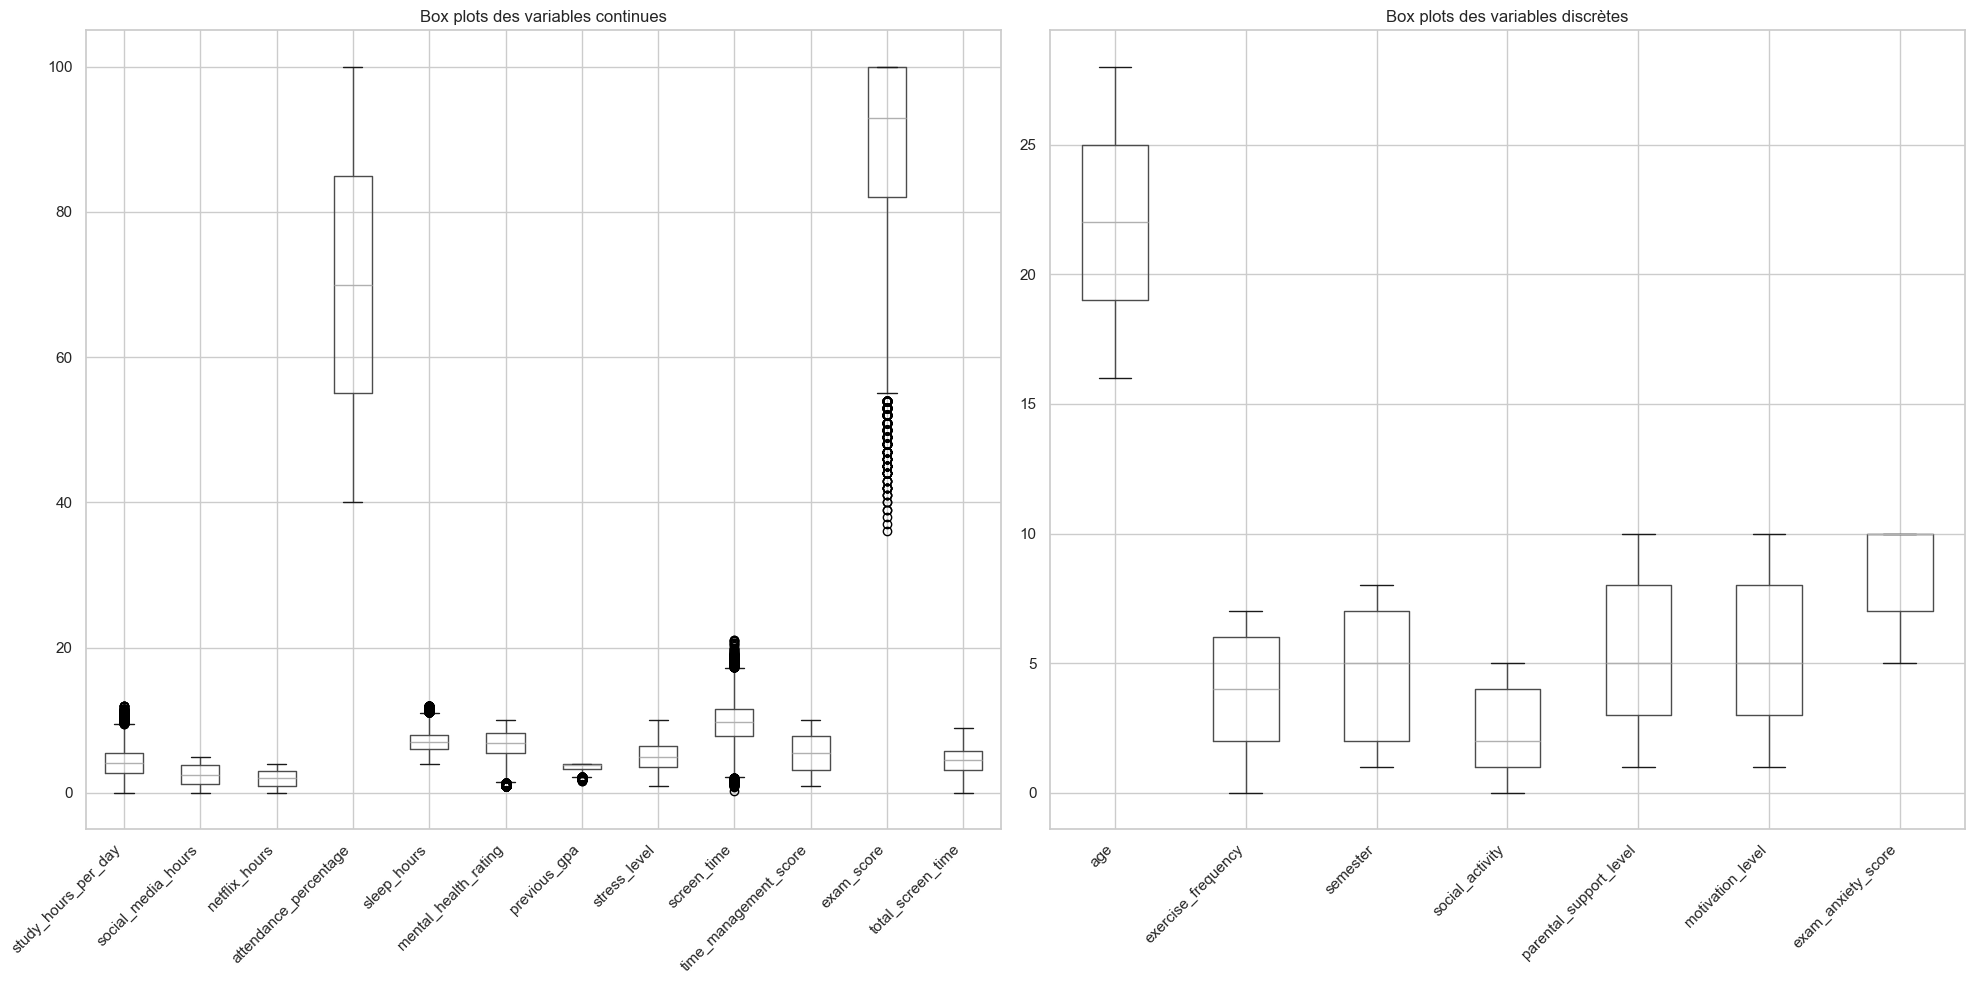

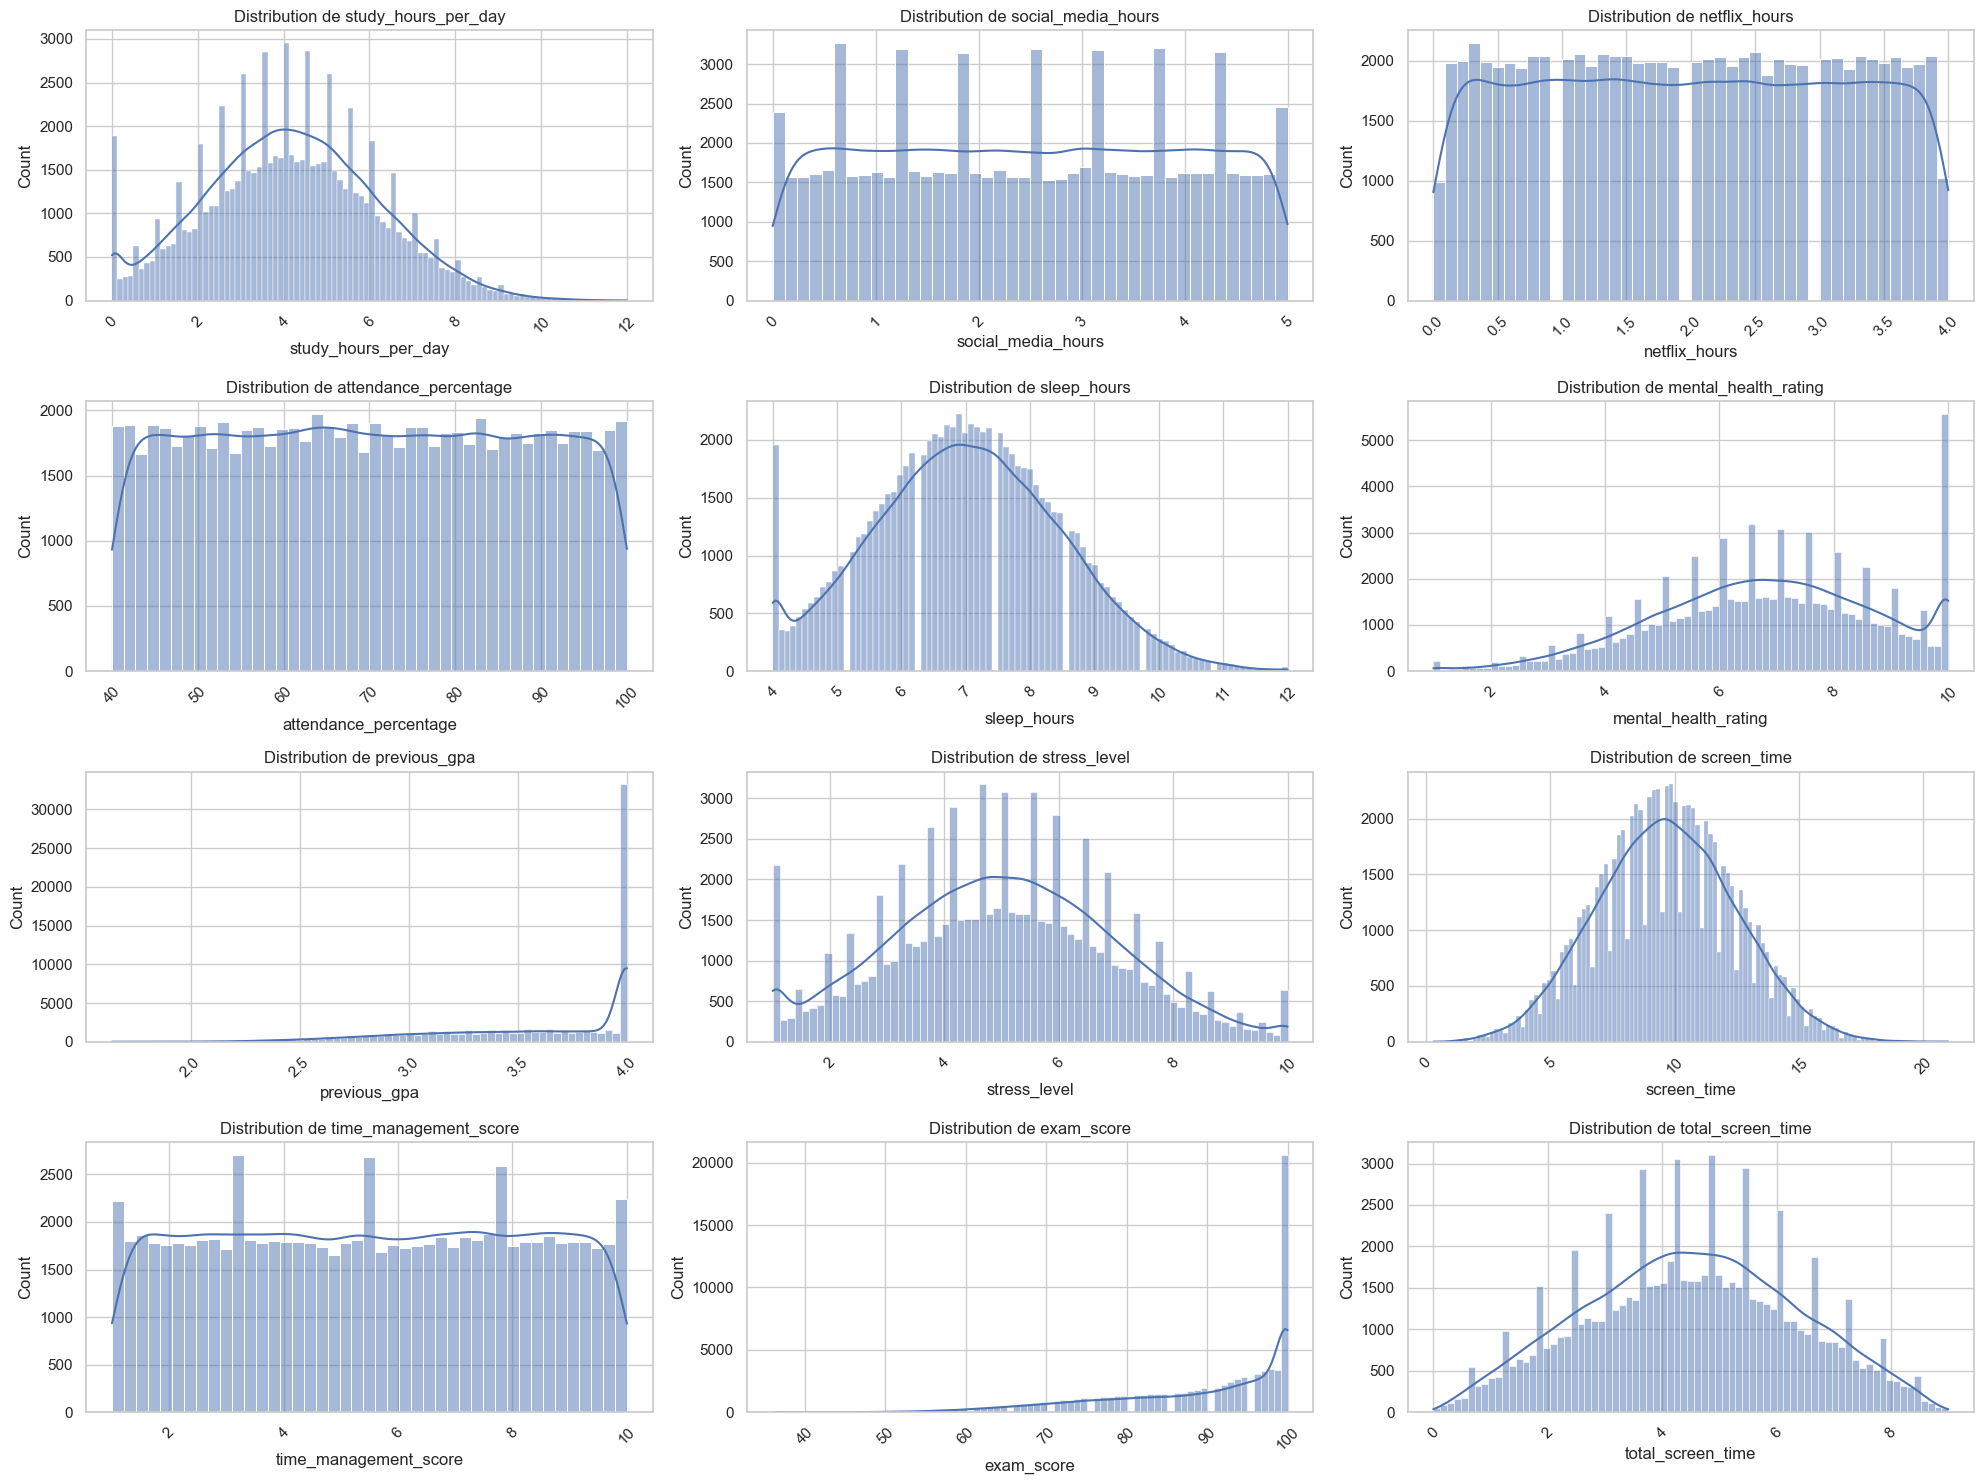

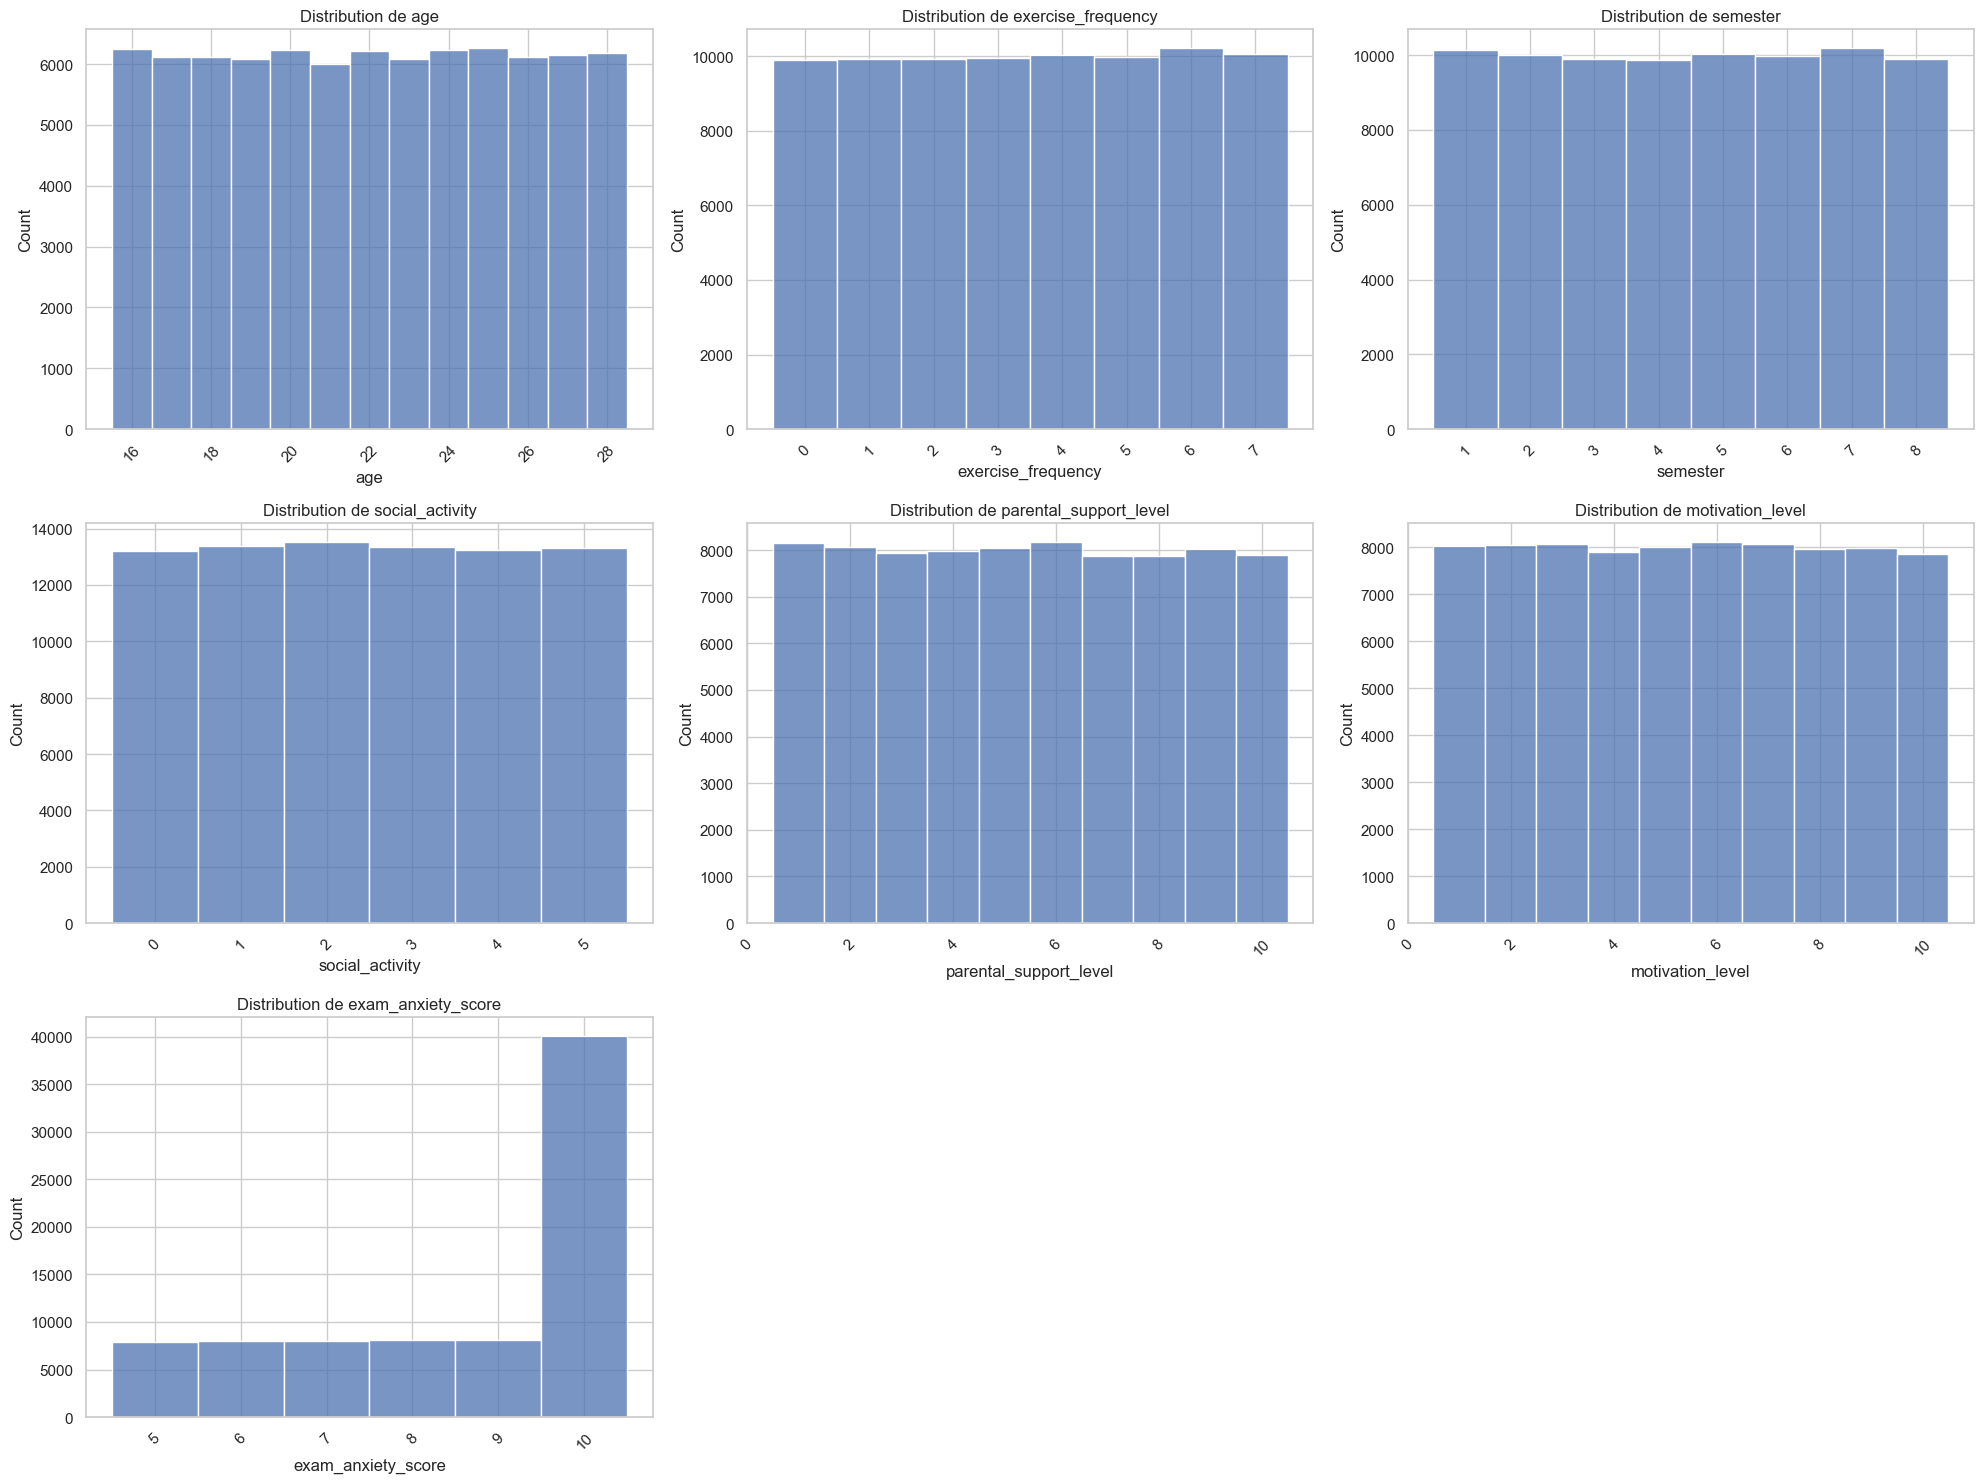

In [23]:
# Sélection des variables quantitatives continues
continuous_vars = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'mental_health_rating',
                   'previous_gpa', 'stress_level', 'screen_time', 'time_management_score',
                   'exam_score', 'total_screen_time']

# Sélection des variables quantitatives discrètes
discrete_vars = ['age', 'exercise_frequency', 'semester', 'social_activity',
                 'parental_support_level', 'motivation_level', 'exam_anxiety_score']

# Statistiques descriptives pour les variables continues
print("Statistiques descriptives pour les variables continues:")
stats_continuous = df[continuous_vars].describe()
stats_continuous.loc['skewness'] = df[continuous_vars].skew()
stats_continuous.loc['kurtosis'] = df[continuous_vars].kurtosis()
print(stats_continuous.round(2))

# Statistiques descriptives pour les variables discrètes
print("\nStatistiques descriptives pour les variables discrètes:")
stats_discrete = df[discrete_vars].describe()
stats_discrete.loc['skewness'] = df[discrete_vars].skew()
stats_discrete.loc['kurtosis'] = df[discrete_vars].kurtosis()
print(stats_discrete.round(2))

# Création de box plots pour les variables continues
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df[continuous_vars].boxplot(figsize=(15, 8), rot=90)
plt.title('Box plots des variables continues')
plt.xticks(rotation=45, ha='right')

# Création de box plots pour les variables discrètes
plt.subplot(1, 2, 2)
df[discrete_vars].boxplot(figsize=(15, 8), rot=90)
plt.title('Box plots des variables discrètes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Histogrammes pour les variables continues
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogrammes pour les variables discrètes
plt.figure(figsize=(20, 15))
for i, var in enumerate(discrete_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, discrete=True)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3.4 Analyse des variables binaires

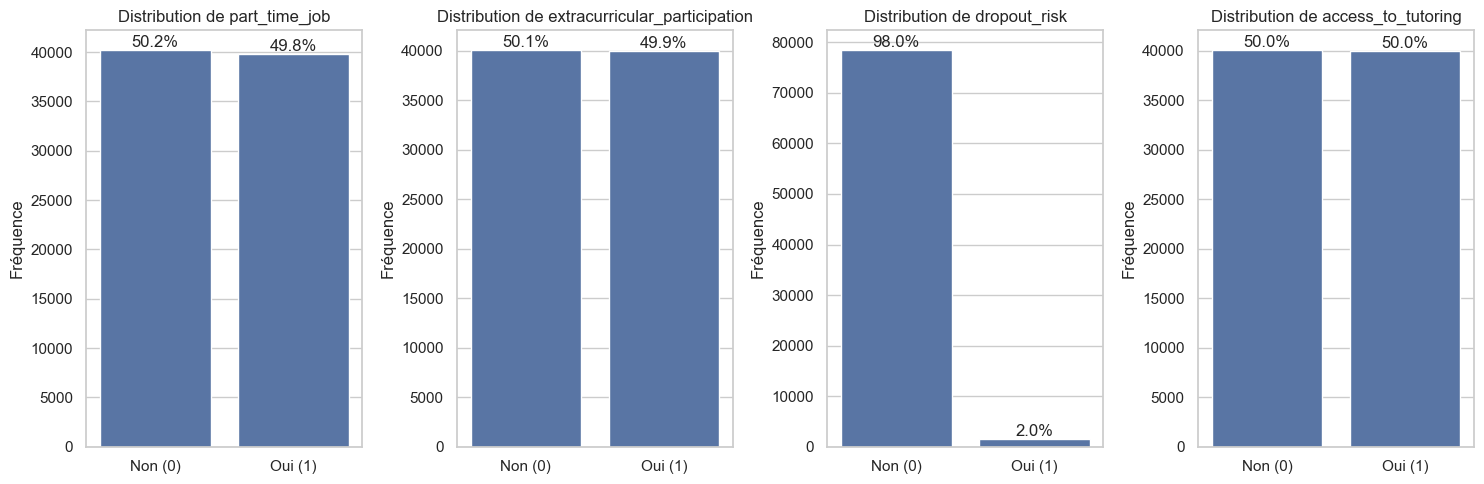


Statistiques pour les variables binaires:

part_time_job:
         Fréquence  Pourcentage
Non (0)      40195     50.24375
Oui (1)      39805     49.75625

extracurricular_participation:
         Fréquence  Pourcentage
Non (0)      40058      50.0725
Oui (1)      39942      49.9275

dropout_risk:
         Fréquence  Pourcentage
Non (0)      78418      98.0225
Oui (1)       1582       1.9775

access_to_tutoring:
         Fréquence  Pourcentage
Non (0)      40039     50.04875
Oui (1)      39961     49.95125


In [24]:
# Liste des variables binaires
binary_vars = ['part_time_job', 'extracurricular_participation',
               'dropout_risk', 'access_to_tutoring']

# Création d'une figure pour les diagrammes en barres
plt.figure(figsize=(15, 5))

for i, var in enumerate(binary_vars, 1):
    plt.subplot(1, 4, i)

    # Calcul des fréquences relatives
    freq = df[var].value_counts()
    rel_freq = df[var].value_counts(normalize=True) * 100

    # Création du diagramme en barres
    sns.barplot(x=['Non (0)', 'Oui (1)'], y=freq.values)
    plt.title(f'Distribution de {var}')
    plt.ylabel('Fréquence')

    # Ajout des pourcentages au-dessus des barres
    for j, v in enumerate(freq.values):
        plt.text(j, v, f'{rel_freq.values[j]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques détaillées pour chaque variable binaire
print("\nStatistiques pour les variables binaires:")
for var in binary_vars:
    print(f"\n{var}:")
    freq_table = pd.DataFrame({
        'Fréquence': df[var].value_counts(),
        'Pourcentage': df[var].value_counts(normalize=True) * 100
    })
    freq_table.index = ['Non (0)', 'Oui (1)']
    print(freq_table)


## 3.6 Synthèse des Observations de l'Analyse Univariée

### 1. Démographie et Caractéristiques des Étudiants

- **Distribution par Genre** : La population étudiante est très équilibrée avec environ 33.4% pour chaque catégorie (Femme, Homme, Autre).
- **Répartition par Filière** : Les six filières principales (Arts, Psychologie, Informatique, Business, Ingénierie, Biologie) sont représentées de manière quasi-équitable, chacune comptant environ 16-17% des étudiants.
- **Âge** : L'âge moyen est de 22 ans, avec une distribution s'étendant de 16 à 28 ans (écart-type de 3.75 ans).

### 2. Conditions d'Études et Mode de Vie

- **Emploi et Activités** :
  - Environ 50% des étudiants ont un emploi à temps partiel
  - La participation aux activités extrascolaires est également équilibrée (50%)
  - L'accès au tutorat est disponible pour environ 50% des étudiants

- **Environnement d'Étude** :
  - Distribution équilibrée entre les différents lieux d'étude (≈20% chacun) : dortoir, café, salle calme, groupe d'étude, bibliothèque
  - Qualité Internet : répartition équitable entre niveau bas, moyen et haut (≈33% chacun)

### 3. Performance Académique et Habitudes d'Étude

- **Temps d'Étude et Performance** :
  - Moyenne de 4.17 heures d'étude par jour (écart-type : 2 heures)
  - Taux de présence moyen de 70% (écart-type : 17.33%)
  - Score moyen aux examens de 89.14/100 (distribution négativement asymétrique, skewness : -1.03)
  - GPA moyen précédent de 3.6/4.0

- **Utilisation du Temps** :
  - Temps d'écran total moyen : 9.67 heures/jour
    - Médias sociaux : 2.5 heures/jour
    - Netflix : 2 heures/jour
  - Score moyen de gestion du temps : 5.5/10

### 4. Bien-être et Santé

- **Sommeil et Exercice** :
  - Moyenne de 7 heures de sommeil par jour
  - Fréquence d'exercice moyenne de 3.5 fois par semaine

- **Santé Mentale et Stress** :
  - Note moyenne de santé mentale : 6.8/10
  - Niveau de stress moyen : 5/10
  - Score moyen d'anxiété aux examens : 8.51/10 (relativement élevé)

### 5. Facteurs de Risque et Support

- **Risque d'Abandon** : Seulement 1.98% des étudiants présentent un risque d'abandon
- **Support Parental** : 
  - Niveau moyen de support parental : 5.48/10
  - Distribution équilibrée des niveaux d'éducation parentale
- **Situation Économique** : Distribution équitable entre les niveaux de revenus familiaux (≈33% pour chaque catégorie)

### 6. Styles d'Apprentissage

Distribution relativement équilibrée entre les quatre styles :
- Kinesthésique : 25.18%
- Visuel : 25.07%
- Lecture/Écriture : 25%
- Auditif : 24.75%

### Points Clés pour l'Analyse Bivariée à Venir

1. Explorer les corrélations entre le temps d'écran total et les performances académiques
2. Analyser l'impact des heures de sommeil sur la santé mentale et les résultats
3. Étudier la relation entre le niveau de stress et le risque d'abandon
4. Examiner l'influence du support parental et du revenu familial sur les performances

# 4. Statistiques bivariées et corrélations

Dans cette section, nous allons analyser les relations entre les différentes variables de notre jeu de données. Nous allons procéder en trois étapes :

1. **Analyse des corrélations entre variables quantitatives**
   - Utilisation de la corrélation de Pearson pour les relations linéaires
   - Utilisation de la corrélation de Spearman pour les relations monotones non-linéaires
   - Visualisation avec une heatmap des corrélations

2. **Analyse des relations entre variables quantitatives et qualitatives**
   - Utilisation du rapport de corrélation
   - Visualisation avec des boîtes à moustaches

3. **Analyse des relations entre variables qualitatives**
   - Utilisation de tableaux de contingence
   - Test du chi-deux d'indépendance


## 4.1 Analyse des corrélations entre variables quantitatives

In [ ]:
# Sélection des variables quantitatives
quantitative_vars = [
    'age', 'study_hours_per_day', 'attendance_percentage', 'exam_score', 'previous_gpa',
    'sleep_hours', 'exercise_frequency', 'mental_health_rating',
    'stress_level', 'exam_anxiety_score', 'parental_support_level',
    'social_media_hours', 'netflix_hours', 'total_screen_time',
    'time_management_score'
]

### 4.1.1 Corrélation de Pearson

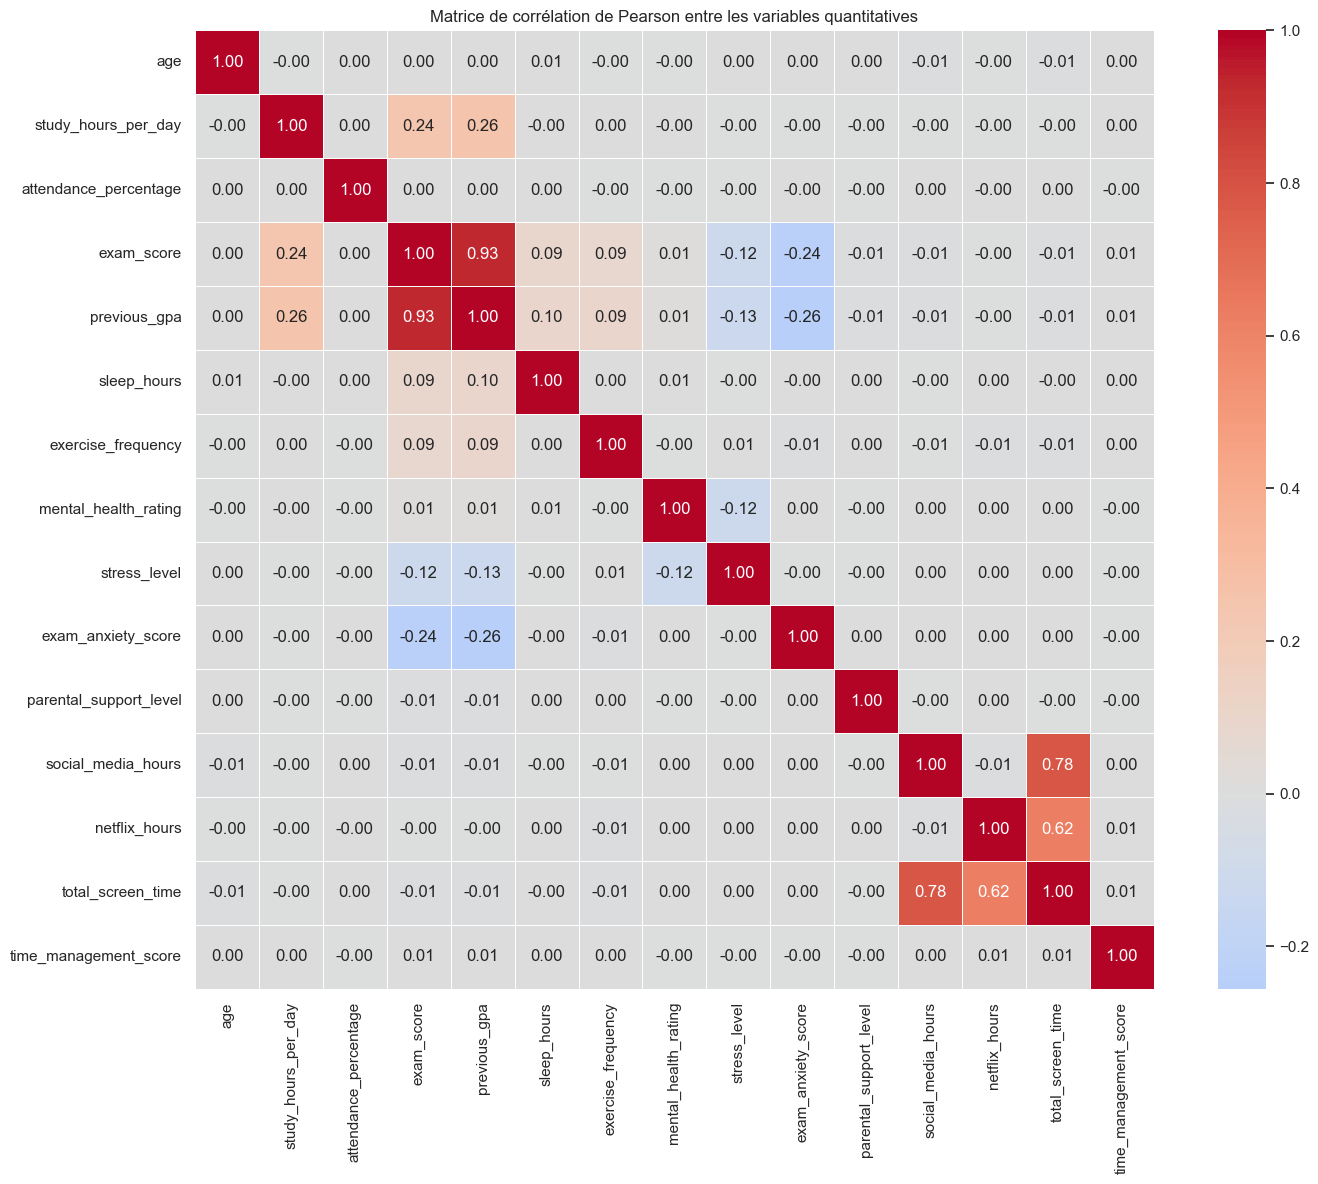


Les 10 corrélations les plus fortes (en valeur absolue) :
               Variable 1          Variable 2  Corrélation
39             exam_score        previous_gpa     0.932940
100    social_media_hours   total_screen_time     0.779428
102         netflix_hours   total_screen_time     0.621568
16    study_hours_per_day        previous_gpa     0.257445
54           previous_gpa  exam_anxiety_score    -0.255692
15    study_hours_per_day          exam_score     0.241460
44             exam_score  exam_anxiety_score    -0.235909
53           previous_gpa        stress_level    -0.127729
43             exam_score        stress_level    -0.118550
77   mental_health_rating        stress_level    -0.116863


In [11]:
# Calcul des corrélations de Pearson
pearson_corr = df[quantitative_vars].corr(method='pearson')

# Création d'une heatmap des corrélations
plt.figure(figsize=(15, 12))
sns.heatmap(pearson_corr,
            annot=True,  # Affiche les valeurs
            cmap='coolwarm',  # Palette de couleurs
            center=0,  # Centre la palette de couleurs sur 0
            fmt='.2f',  # Format des nombres (2 décimales)
            square=True,  # Cellules carrées
            linewidths=0.5)  # Largeur des lignes entre les cellules

plt.title('Matrice de corrélation de Pearson entre les variables quantitatives')
plt.tight_layout()
plt.show()

# Identification des corrélations les plus fortes (en valeur absolue)
# On crée un DataFrame avec les paires de variables et leurs corrélations
correlations = []
for i in range(len(quantitative_vars)):
    for j in range(i + 1, len(quantitative_vars)):
        var1 = quantitative_vars[i]
        var2 = quantitative_vars[j]
        corr = pearson_corr.iloc[i, j]
        correlations.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Corrélation': corr
        })

corr_df = pd.DataFrame(correlations)
print("\nLes 10 corrélations les plus fortes (en valeur absolue) :")
print(corr_df.sort_values(by='Corrélation', key=abs, ascending=False).head(10))


### 4.1.2 Corrélations de Spearman

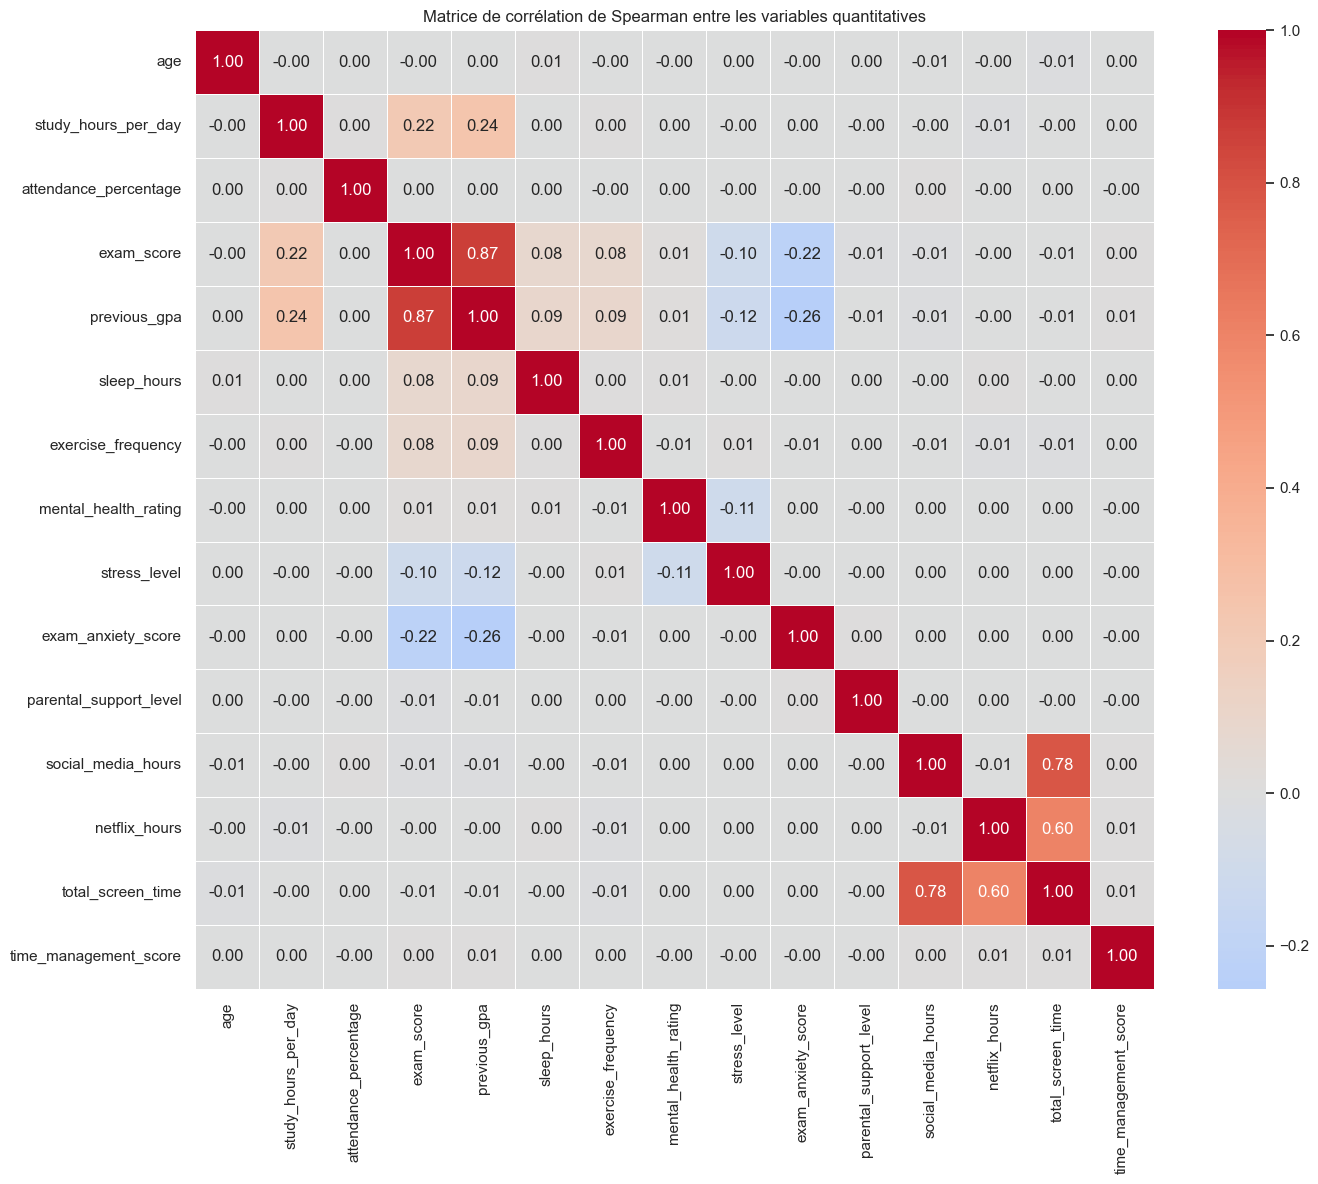


Les 10 plus grandes différences entre les corrélations de Spearman et Pearson :
               Variable 1          Variable 2   Pearson  Spearman  \
39             exam_score        previous_gpa  0.932940  0.872368   
15    study_hours_per_day          exam_score  0.241460  0.216272   
102         netflix_hours   total_screen_time  0.621568  0.604517   
44             exam_score  exam_anxiety_score -0.235909 -0.221174   
43             exam_score        stress_level -0.118550 -0.104275   
16    study_hours_per_day        previous_gpa  0.257445  0.244870   
40             exam_score         sleep_hours  0.090820  0.079995   
77   mental_health_rating        stress_level -0.116863 -0.106545   
41             exam_score  exercise_frequency  0.086983  0.077579   
53           previous_gpa        stress_level -0.127729 -0.118781   

     Différence absolue  
39             0.060572  
15             0.025188  
102            0.017051  
44             0.014735  
43             0.014274  
16 

In [ ]:
spearman_corr = df[quantitative_vars].corr(method='spearman')

# Création d'une heatmap des corrélations de Spearman
plt.figure(figsize=(15, 12))
sns.heatmap(spearman_corr,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5)

plt.title('Matrice de corrélation de Spearman entre les variables quantitatives')
plt.tight_layout()
plt.show()

# Identification des différences notables entre Pearson et Spearman
diff_corr = spearman_corr - pearson_corr

# Affichage des différences les plus importantes
print("\nLes 10 plus grandes différences entre les corrélations de Spearman et Pearson :")
differences = []
for i in range(len(quantitative_vars)):
    for j in range(i + 1, len(quantitative_vars)):
        var1 = quantitative_vars[i]
        var2 = quantitative_vars[j]
        diff = abs(spearman_corr.iloc[i, j] - pearson_corr.iloc[i, j])
        differences.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Pearson': pearson_corr.iloc[i, j],
            'Spearman': spearman_corr.iloc[i, j],
            'Différence absolue': diff
        })

diff_df = pd.DataFrame(differences)
print(diff_df.sort_values(by='Différence absolue', ascending=False).head(10))


## 4.2 Analyse des relations entre variables quantitatives et qualitatives


Rapports de corrélation entre variables qualitatives et quantitatives :
   Variable catégorielle     Variable numérique  Rapport de corrélation
25     study_environment           previous_gpa                0.180094
8                  major    study_hours_per_day                0.179289
24     study_environment             exam_score                0.168719
7                  major           previous_gpa                0.047702
6                  major             exam_score                0.044402
3                 gender  attendance_percentage                0.010492
11                 major           stress_level                0.009799
2                 gender    study_hours_per_day                0.009216
10                 major   mental_health_rating                0.009198
12          diet_quality             exam_score                0.008931
34   family_income_range   mental_health_rating                0.008584
41        learning_style           stress_level                

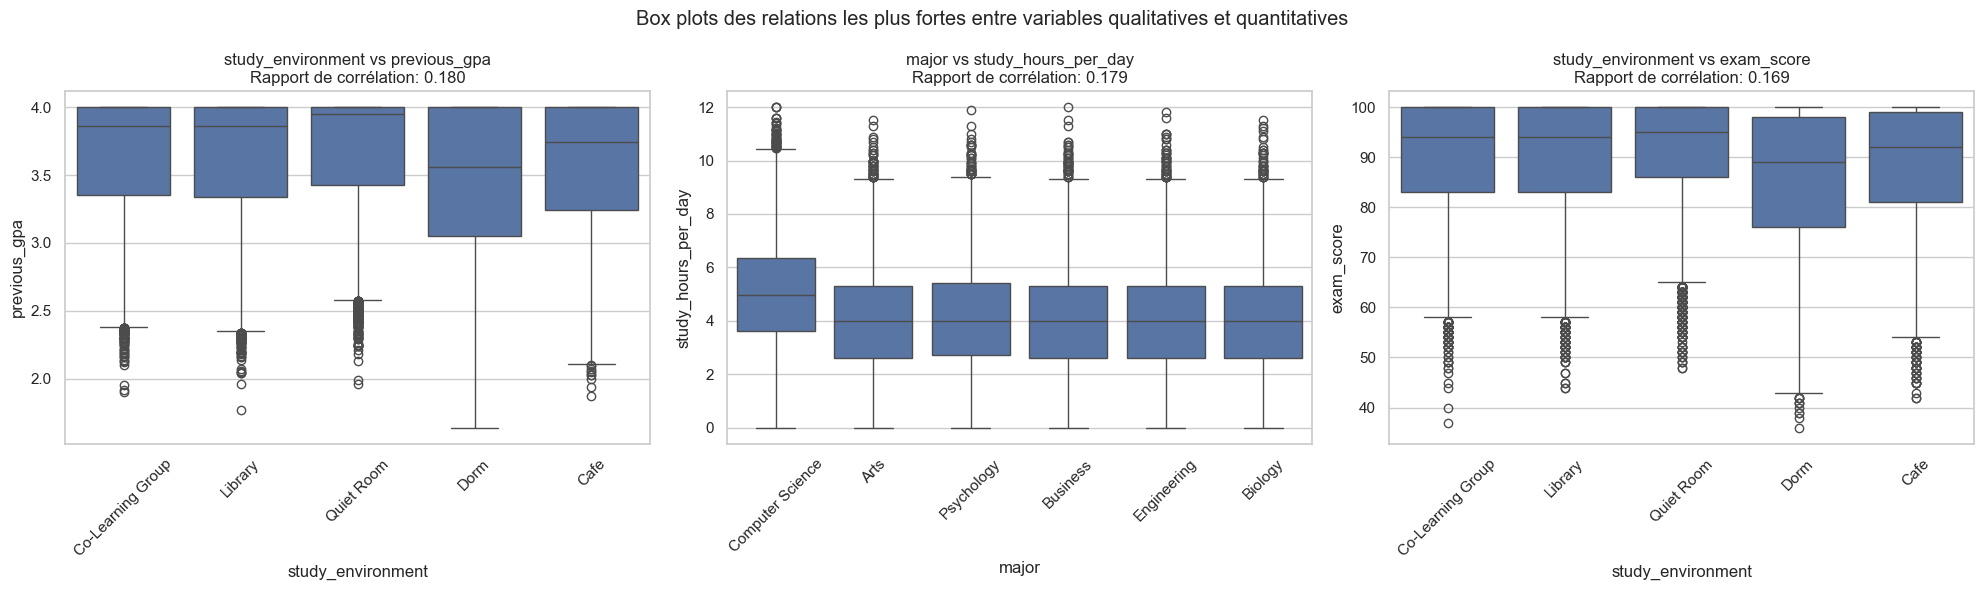

In [ ]:
# Fonction pour calculer le rapport de corrélation
def correlation_ratio(categorical_var, numerical_var):
    """
    Calcule le rapport de corrélation entre une variable catégorielle et une variable numérique
    """
    # Moyenne globale
    mean_global = numerical_var.mean()

    # Calcul des moyennes par groupe
    means_by_group = numerical_var.groupby(categorical_var).mean()
    counts_by_group = numerical_var.groupby(categorical_var).count()

    # Variance inter-groupes
    var_inter = ((means_by_group - mean_global) ** 2 * counts_by_group).sum() / len(numerical_var)

    # Variance totale
    var_total = ((numerical_var - mean_global) ** 2).sum() / len(numerical_var)

    # Rapport de corrélation
    return np.sqrt(var_inter / var_total)


# Variables qualitatives à analyser
categorical_vars = [
    'gender', 'major', 'diet_quality', 'internet_quality',
    'study_environment', 'family_income_range', 'learning_style'
]

# Variables quantitatives importantes
key_numerical_vars = [
    'exam_score', 'previous_gpa', 'study_hours_per_day', 'attendance_percentage',
    'mental_health_rating', 'stress_level'
]

# Calcul des rapports de corrélation
correlation_ratios = []
for cat_var in categorical_vars:
    for num_var in key_numerical_vars:
        ratio = correlation_ratio(df[cat_var], df[num_var])
        correlation_ratios.append({
            'Variable catégorielle': cat_var,
            'Variable numérique': num_var,
            'Rapport de corrélation': ratio
        })

# Création d'un DataFrame avec les résultats
ratios_df = pd.DataFrame(correlation_ratios)
print("\nRapports de corrélation entre variables qualitatives et quantitatives :")
print(ratios_df.sort_values(by='Rapport de corrélation', ascending=False))

# Visualisation des relations les plus fortes avec des box plots
# Prenons les 3 paires de variables avec les plus forts rapports de corrélation
top_3_pairs = ratios_df.nlargest(3, 'Rapport de corrélation')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Box plots des relations les plus fortes entre variables qualitatives et quantitatives')

for i, (_, row) in enumerate(top_3_pairs.iterrows()):
    cat_var = row['Variable catégorielle']
    num_var = row['Variable numérique']
    ratio = row['Rapport de corrélation']

    sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i])
    axes[i].set_title(f'{cat_var} vs {num_var}\nRapport de corrélation: {ratio:.3f}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4.3 Analyse des relations entre variables qualitatives


Force des associations entre variables qualitatives (V de Cramer) :
             Variable 1           Variable 2  V de Cramer   p-value
8                 major    study_environment     0.010351  0.024269
6                 major         diet_quality     0.009928  0.106412
0                gender                major     0.009743  0.125305
12         diet_quality    study_environment     0.007580  0.326195
15     internet_quality    study_environment     0.007557  0.330936
18    study_environment  family_income_range     0.007350  0.373239
7                 major     internet_quality     0.006825  0.682038
19    study_environment       learning_style     0.006223  0.677498
11         diet_quality     internet_quality     0.006219  0.185465
17     internet_quality       learning_style     0.006054  0.438670
5                gender       learning_style     0.005971  0.457158
3                gender    study_environment     0.005923  0.690375
10                major       learning_style   

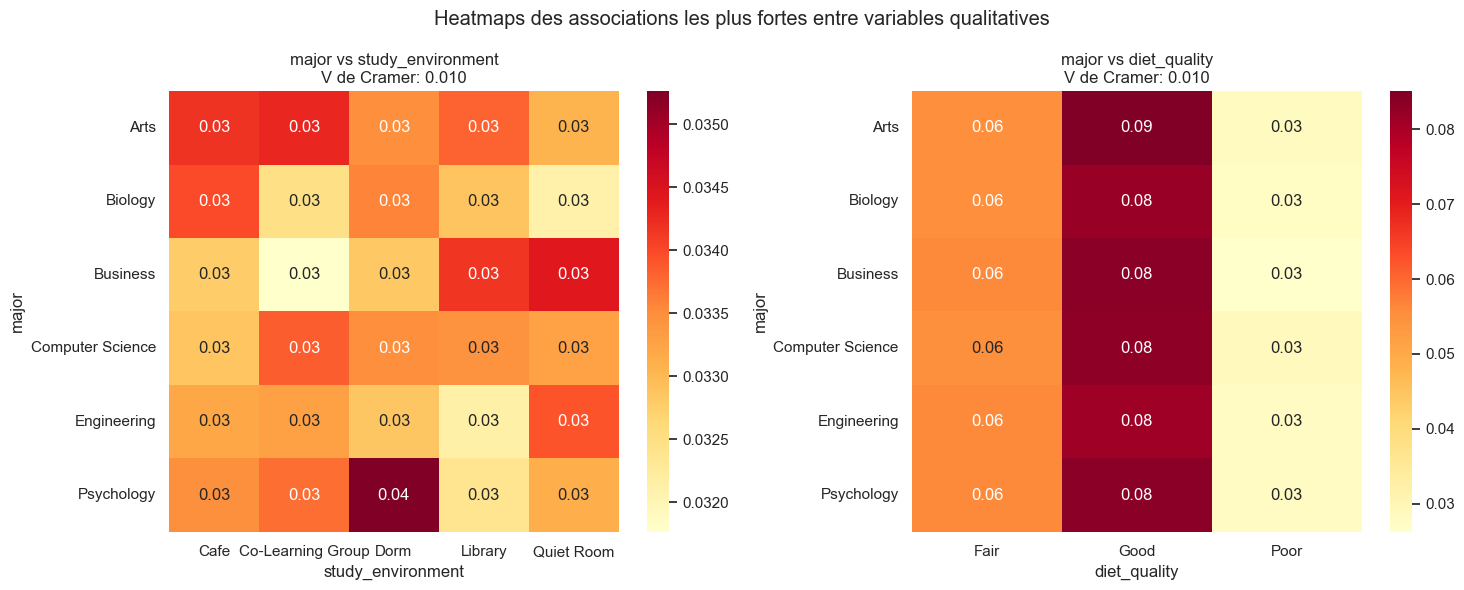

In [14]:
from scipy.stats import chi2_contingency


# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    """
    Calcule le V de Cramer à partir d'une matrice de confusion

    Parameters
    ----------
    confusion_matrix:
        Matrice de confusion (tableau de contingence) entre deux variables qualitatives

    Returns
    -------
    float
        V de Cramer, une mesure de l'association entre deux variables qualitatives.

    """
    chi_2 = chi2_contingency(confusion_matrix)[0]
    # Le nombre total d'observations
    n = confusion_matrix.sum().sum()

    # Le nombre de catégories dans les deux variables
    min_dim = min(confusion_matrix.shape) - 1

    # Calcul du V de Cramer
    return np.sqrt(chi_2 / (n * min_dim))


# Variables qualitatives à analyser
categorical_vars = [
    'gender', 'major', 'diet_quality', 'internet_quality',
    'study_environment', 'family_income_range', 'learning_style'
]

# Calcul des V de Cramer pour chaque paire de variables
cramer_results = []
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # Création de la table de contingence
        contingency = pd.crosstab(df[var1], df[var2])

        # Calcul du V de Cramer
        v = cramers_v(contingency)

        # Test du chi-deux
        chi2, p_value, _, _ = chi2_contingency(contingency)

        cramer_results.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'V de Cramer': v,
            'p-value': p_value
        })

# Création d'un DataFrame avec les résultats
cramer_df = pd.DataFrame(cramer_results)
print("\nForce des associations entre variables qualitatives (V de Cramer) :")
print(cramer_df.sort_values(by='V de Cramer', ascending=False))

# Visualisation des relations les plus fortes avec des heatmaps
# Prenons les 2 paires de variables avec les plus fortes associations
top_2_pairs = cramer_df.nlargest(2, 'V de Cramer')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Heatmaps des associations les plus fortes entre variables qualitatives')

for i, (_, row) in enumerate(top_2_pairs.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    v = row['V de Cramer']

    # Création de la table de contingence normalisée
    contingency = pd.crosstab(df[var1], df[var2], normalize='all')

    # Création de la heatmap
    sns.heatmap(contingency, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}\nV de Cramer: {v:.3f}')

plt.tight_layout()
plt.show()


## 4.4 Synthèse de l'analyse bivariée

### 1. Relations entre variables quantitatives

#### Corrélations positives fortes
- La plus forte corrélation est observée entre `exam_score` et `previous_gpa` (r = 0.93), indiquant une forte continuité dans la performance académique
- Le temps total d'écran est fortement corrélé avec :
  - Le temps passé sur les réseaux sociaux (r = 0.78)
  - Le temps passé sur Netflix (r = 0.62)

#### Corrélations modérées
- Le temps d'étude (`study_hours_per_day`) montre des corrélations positives modérées avec :
  - Le GPA précédent (r = 0.26)
  - Les scores aux examens (r = 0.24)

#### Corrélations négatives
- L'anxiété aux examens (`exam_anxiety_score`) est négativement corrélée avec :
  - Le GPA précédent (r = -0.26)
  - Les scores aux examens (r = -0.24)
- Le niveau de stress montre des corrélations négatives faibles mais significatives avec :
  - Le GPA précédent (r = -0.13)
  - Les scores aux examens (r = -0.12)
  - La santé mentale (r = -0.12)

#### Comparaison Pearson vs Spearman
- La plus grande différence entre les corrélations de Pearson et Spearman est observée pour la relation `exam_score`/`previous_gpa` (différence de 0.06)
- Les autres différences sont relativement faibles (<0.03), suggérant que la plupart des relations sont approximativement linéaires

### 2. Relations entre variables quantitatives et qualitatives

Les rapports de corrélation les plus significatifs concernent :

1. L'environnement d'étude qui influence :
   - Le GPA précédent (η = 0.18)
   - Les scores aux examens (η = 0.17)

2. La filière (major) qui impacte :
   - Le temps d'étude quotidien (η = 0.18)
   - Les performances académiques (η ≈ 0.05)

3. Les autres variables qualitatives (genre, qualité de l'internet, style d'apprentissage) montrent des rapports de corrélation faibles (η < 0.01) avec les variables quantitatives

### 3. Relations entre variables qualitatives

L'analyse des V de Cramer et des p-values révèle :

- Des associations faibles mais significatives (p < 0.05) entre :
  - La filière et l'environnement d'étude (V = 0.010, p = 0.024)

- Des associations non significatives mais notables entre :
  - La filière et la qualité de l'alimentation (V = 0.010, p = 0.106)
  - Le genre et la filière (V = 0.010, p = 0.125)

- La plupart des autres associations entre variables qualitatives sont très faibles (V < 0.008) et non significatives (p > 0.05)

### Implications pour l'analyse

1. **Performance académique** : Les résultats suggèrent une forte continuité dans la performance académique, influencée négativement par l'anxiété et le stress.

2. **Temps d'écran** : L'utilisation des médias sociaux et de Netflix contribue significativement au temps d'écran total, mais leur impact sur la performance académique semble limité.

3. **Environnement d'étude** : C'est un facteur important qui influence la performance académique, suggérant l'importance des conditions d'étude.

4. **Filière d'études** : Elle influence principalement le temps d'étude, avec des variations significatives entre les différentes disciplines.

Ces résultats seront précieux pour l'analyse en composantes principales (ACP) à venir, en nous permettant de nous concentrer sur les variables les plus pertinentes et leurs interactions.
